In [1]:
import numpy as np
print("numpy version: {}".format(np.__version__))
import pandas as pd 
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import scipy as sp
print("scipy version: {}".format(sp.__version__))
import sklearn as sl
print("scikit-learn: {}".format(sl.__version__))
import seaborn as sns
print("seaborn: {}".format(sns.__version__))
import statsmodels as sm
print("statsmodels: {}".format(sm.__version__))

numpy version: 1.17.4
pandas version: 0.25.3
matplotlib version: 3.1.2
scipy version: 1.3.3
scikit-learn: 0.21.3
seaborn: 0.9.0
statsmodels: 0.10.2


    matplotlib is a desktop plotting package designed for creating (mostly two-
    dimensional) publication-quality plots.

    Over time, matplotlib has spawned a number of add-on toolkits for data visualization
    that use matplotlib for their underlying plotting. One of these is seaborn, which we
    explore later in this chapter.

    The simplest way to follow the code examples in the chapter is to use interactive plotting in the Jupyter notebook. To set this up, execute the following statement in a
    Jupyter notebook:

In [2]:
%matplotlib notebook

    After running %matplotlib notebook in Jupyter (or simply %matplotlib in IPython), we can try creating a simple plot.

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


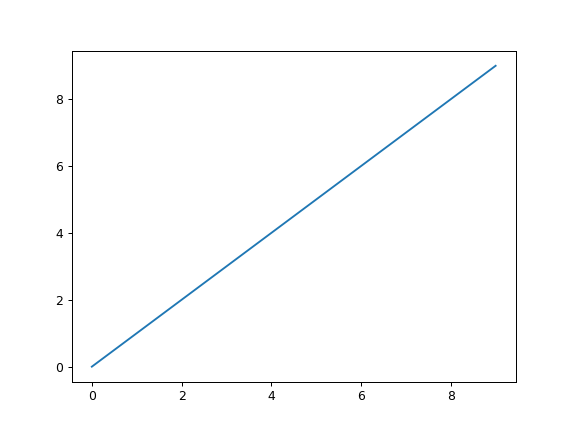

In [5]:
plt.plot(data);

### Figures and Subplots

    Plots in matplotlib reside within a Figure object. You can create a new figure with
    plt.figure :

<IPython.core.display.Javascript object>


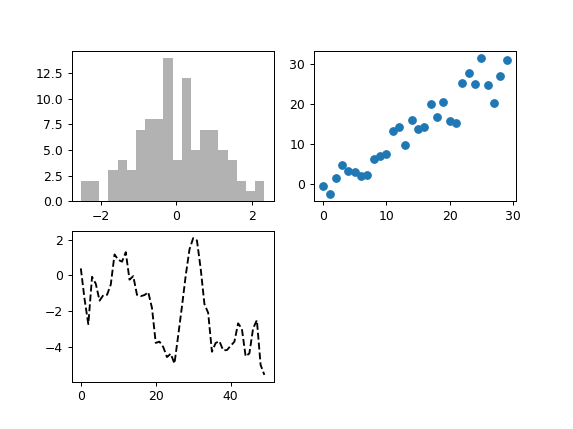

In [6]:
fig = plt.figure()

    You can’t make a plot with a blank figure. You have to create one or more subplots
    using add_subplot :

    This means that the figure should be 2 × 2 (so up to four plots in total), and we’re
    selecting the first of four subplots (numbered from 1).

In [7]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

    One nuance of using Jupyter notebooks is that plots are reset after
    each cell is evaluated, so for more complex plots you must put all of
    the plotting commands in a single notebook cell.

    When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), 
    matplotlib draws on the last figure and subplot used (creating one if necessary), 
    thus hiding the figure and subplot creation. So if we add the following command,

In [8]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

    The 'k--' is a style option instructing matplotlib to plot a black dashed line. The
    objects returned by fig.add_subplot here are AxesSubplot objects, on which you
    can directly plot on the other empty subplots by calling each one’s instance method

In [9]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [10]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

    plt.subplots creates a new figure and returns a NumPy array containing the created 
    subplot objects:

<IPython.core.display.Javascript object>


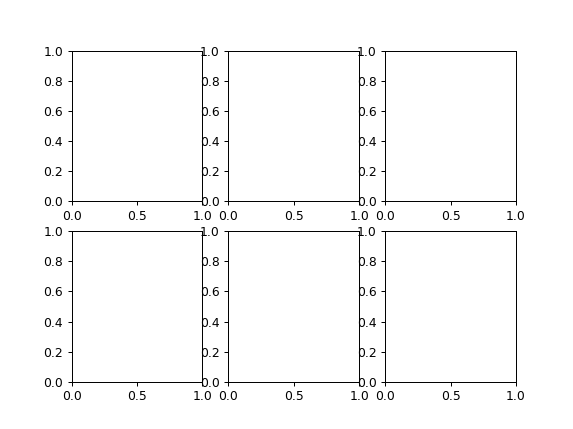

In [11]:
fig, axes = plt.subplots(2, 3)

In [12]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f346008e990>,
      dtype=object)

_pyplot.subplots options_

| Argument | Description |
| --- | --- |
| nrows | Number of rows of subplots |
| ncols | Number of columns of subplots |
| sharex | All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)|
| sharey | All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots) |
| __**fig_kw__ | Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2, figsize=(8, 6)) |

    By default matplotlib leaves a certain amount of padding around the outside of the
    subplots and spacing between subplots.

    You can change the spacing using the subplots_adjust method on Figure objects, also available as a top-level function:

```python
subplots_adjust(left=None, bottom=None, right=None, top=None,
wspace=None, hspace=None)
```

<IPython.core.display.Javascript object>


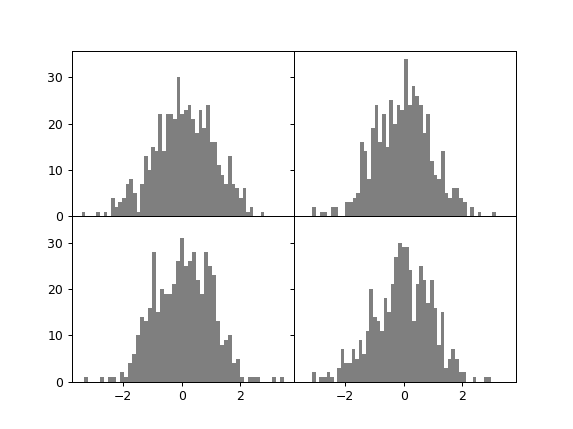

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

    Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally 
    a string abbreviation indicating color and line style.

```python
ax.plot(x, y, 'g--')
```

```python
ax.plot(x, y, linestyle='--', color='g')
```

    Line plots can additionally have markers to highlight the actual data points. Since
    matplotlib creates a continuous line plot, interpolating between points, 
    it can occasionally be unclear where the points lie. 
    The marker can be part of the style string, which must have color followed by marker type and line style

<IPython.core.display.Javascript object>


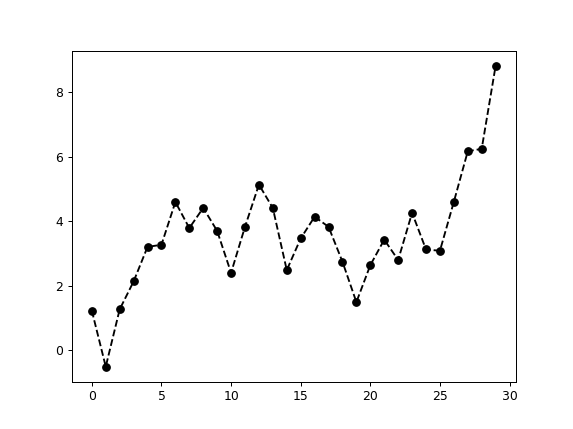

In [14]:
fig = plt.figure()

In [15]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

```python
plot(np.random.randn(30).cumsum(), color='k', linestype='dashed', marker='o')
```

    For line plots, you will notice that subsequent points are linearly interpolated by
    default. This can be altered with the drawstyle option

In [16]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


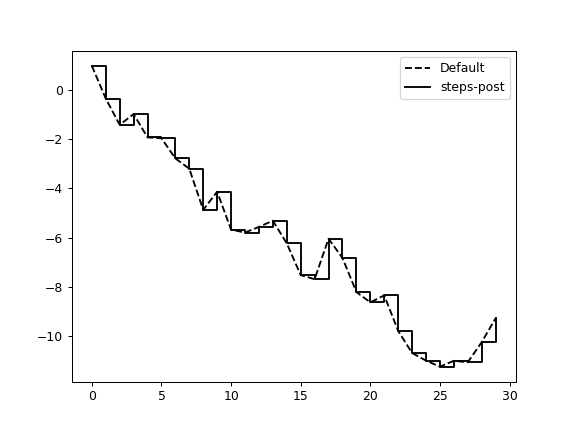

In [17]:
fig = plt.figure()

In [18]:
plt.plot(data, 'k--', label='Default')

In [19]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [20]:
plt.legend(loc='best')

### Ticks, Labels, and Legends

    For most kinds of plot decorations, there are two main ways to do things: using the
    procedural pyplot interface (i.e., matplotlib.pyplot ) and the more object-oriented
    native matplotlib API.

    The pyplot interface, designed for interactive use, consists of methods like xlim ,
    xticks , and xticklabels . These control the plot range, tick locations, and tick labels, respectively. They can be used in two ways:
- Called with no arguments returns the current parameter value (e.g., plt.xlim() returns the current x-axis plotting range)
- Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]) ,sets the x-axis range to 0 to 10)

##### Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


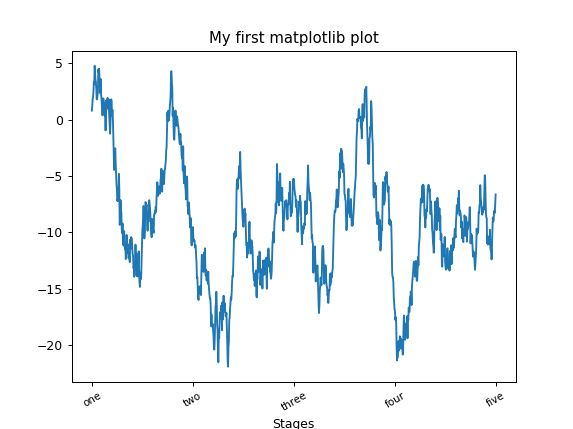

In [21]:
fig = plt.figure()

In [22]:
ax = fig.add_subplot(1, 1, 1)

In [23]:
ax.plot(np.random.randn(1000).cumsum())

    To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels.
    The former instructs matplotlib where to place the ticks along the data range; 
    by default  these locations will also be the labels. But we can set any other values as the labels using set_xticklabels :

In [24]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [25]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')

    The rotation option sets the x tick labels at a 30-degree rotation. 
    Lastly, set_xlabel gives a name to the x-axis and set_title the subplot title

In [26]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [27]:
ax.set_xlabel('Stages')

Text(0.5, 0, 'Stages')

    Modifying the y-axis consists of the same process, substituting y for x in 
    the above. The axes class has a set method that allows batch setting of plot properties. From the prior example, we could also have written:

In [28]:
props = {
    'title' : 'My first matplotlib plot',
    'xlabel' : 'Stages'
}

In [29]:
ax.set(**props)

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'My first matplotlib plot')]

##### Adding legends

    Legends are another critical element for identifying plot elements. 
    There are a couple of ways to add one. 
    The easiest is to pass the label argument when adding each piece of the plot:

<IPython.core.display.Javascript object>


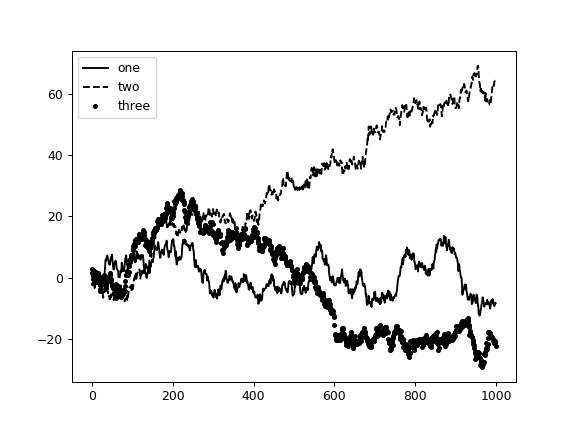

In [30]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [31]:
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')

In [32]:
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')

In [33]:
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

    Once you’ve done this, you can either call ax.legend() or plt.legend() to 
    automatically create a legend.

In [34]:
ax.legend(loc='best')

#### Annotations and Drawing on a Subplot

```python
ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)
```

<IPython.core.display.Javascript object>


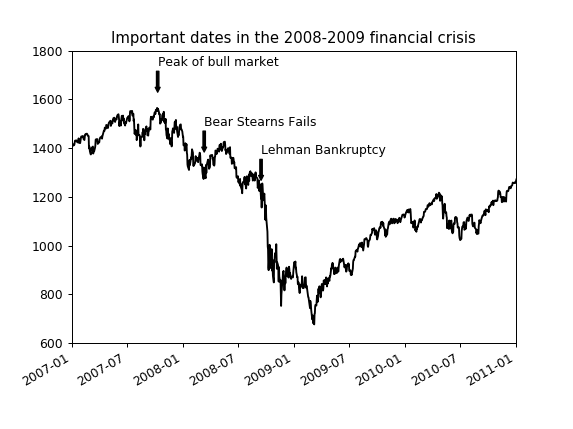

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [35]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

    To add a shape to a plot, you create the patch object shp and add it to a subplot by
    calling ax.add_patch(shp)

<IPython.core.display.Javascript object>


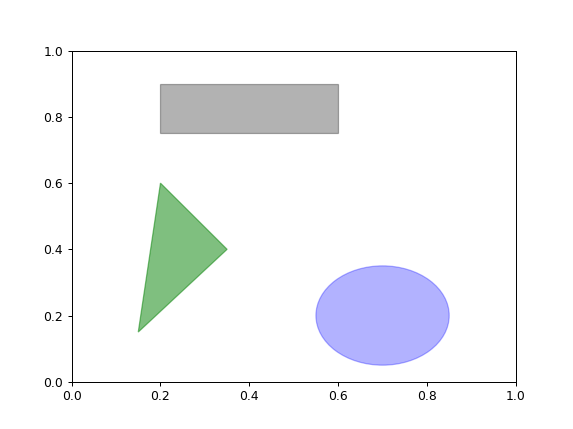

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

#### Saving Plots to File

    You can save the active figure to file using plt.savefig . 
    This method is equivalent to the figure object’s savefig instance method. 
    For example, to save an SVG version of a figure, you need only type:

In [37]:
plt.savefig('figpath.svg')

    The file type is inferred from the file extension. So if you used .pdf instead, you
    would get a PDF. There are a couple of important options that I use frequently for
    publishing graphics: dpi , which controls the dots-per-inch resolution, and
    bbox_inches , which can trim the whitespace around the actual figure. To get the
    same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you
    would do:

In [38]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

    savefig doesn’t have to write to disk; it can also write to any file-like object, 
    such as a BytesIO :

In [39]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

| Argument | Description |
| --- | --- |
| fname | String containing a filepath or a Python file-like object. The figure format is inferred from the file
extension (e.g., .pdf for PDF or .png for PNG)|
| dpi | The figure resolution in dots per inch; defaults to 100 out of the box but can be configured |
| facecolor/edgecolor | The color of the figure background outside of the subplots; 'w' (white), by default |
| format | The explicit file format to use ( 'png' , 'pdf' , 'svg' , 'ps' , 'eps' , ...) |
| bbox_inches | The portion of the figure to save; if 'tight' is passed, will attempt to trim the empty space around the figure |

## matplotlib Configuration

    matplotlib comes configured with color schemes and defaults that are 
    geared primarily toward preparing figures for publication. 
    Fortunately, nearly all of the default behavior can be customized via 
    an extensive set of global parameters governing figure size, subplot spacing, 
    colors, font sizes, grid styles, and so on. 
    One way to modify the configuration programmatically from Python is to use 
    the rc method; for example, to set the global default figure size to be 10 × 10, 
    you could enter:

```python
plt.rc('figure', figsize=(10, 10))
```

    The first argument to rc is the component you wish to customize, such as 'figure' ,
    'axes' , 'xtick' , 'ytick' , 'grid' , 'legend' , or many others. 
    After that can follow a sequence of keyword arguments indicating the new parameters. 
    An easy way to write down the options in your program is as a dict:

```python
font_options = {
    'family' : 'monospace',
    'weight' : 'bold',
    'size' : 'small'
}
plt.rc('font', **font_options)
```

## Plotting with pandas and seaborn

    matplotlib can be a fairly low-level tool. You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations.

    Another library is seaborn , a statistical graphics library

    Importing seaborn modifies the default matplotlib color schemes
    and plot styles to improve readability and aesthetics. Even if you do
    not use the seaborn API, you may prefer to import seaborn as a
    simple way to improve the visual aesthetics of general matplotlib
    plots.

### Line Plots

    Series and DataFrame each have a plot attribute for making some basic plot types. By default, plot() makes line plots

<IPython.core.display.Javascript object>


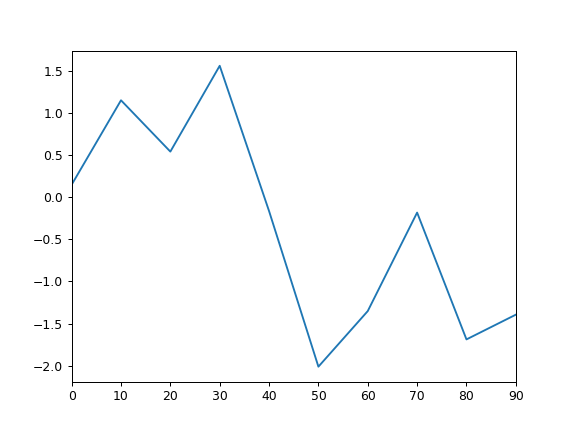

In [40]:
fig = plt.figure()

In [41]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [42]:
s.plot()

    Most of pandas’s plotting methods accept an optional ax parameter, which can be a
    matplotlib subplot object. This gives you more flexible placement of subplots in a grid layout.

In [43]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


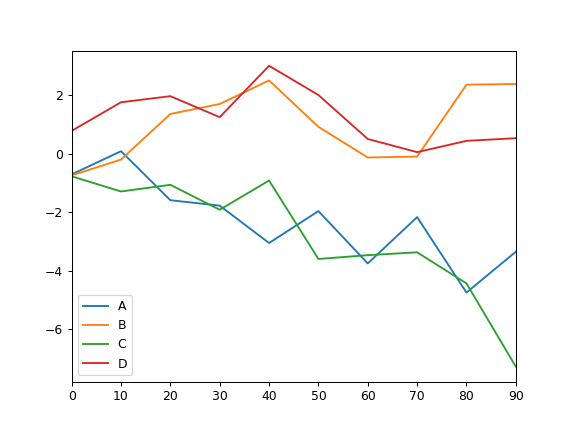

In [44]:
df.plot()

## Bar Plots

    The plot.bar() and plot.barh() make vertical and horizontal bar plots, respec‐
    tively. In this case, the Series or DataFrame index will be used as the x ( bar ) or y ( barh ) ticks

<IPython.core.display.Javascript object>


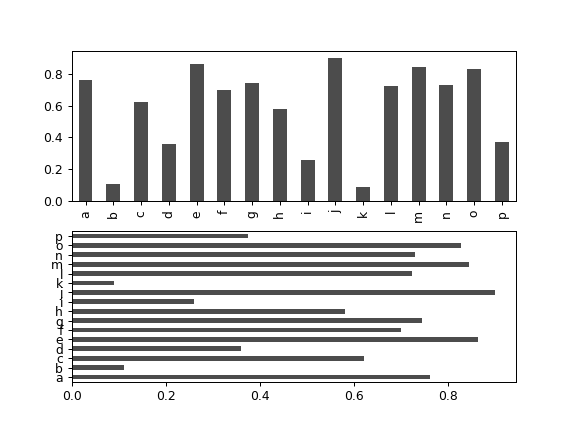

In [45]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [46]:
df = pd.DataFrame(np.random.rand(6, 4),
                    index=['one', 'two', 'three', 'four', 'five', 'six'],
                    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [47]:
df

Genus,A,B,C,D
one,0.630537,0.428465,0.722783,0.783646
two,0.959471,0.453816,0.349100,0.057286
three,0.433123,0.952486,0.968934,0.328563
four,0.287869,0.963225,0.014789,0.272952
five,0.599492,0.135170,0.684099,0.470182
six,0.846821,0.015019,0.106033,0.415856


<IPython.core.display.Javascript object>


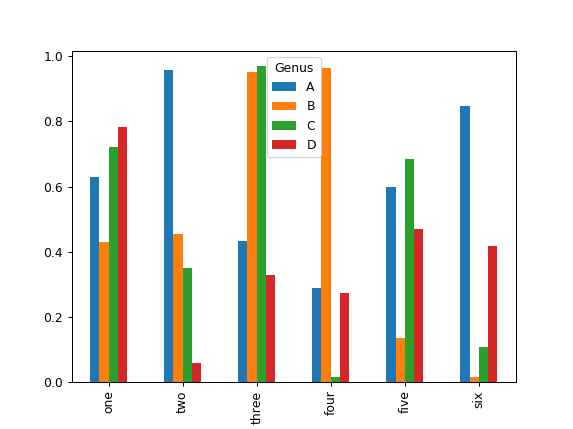

In [48]:
df.plot.bar()

<IPython.core.display.Javascript object>


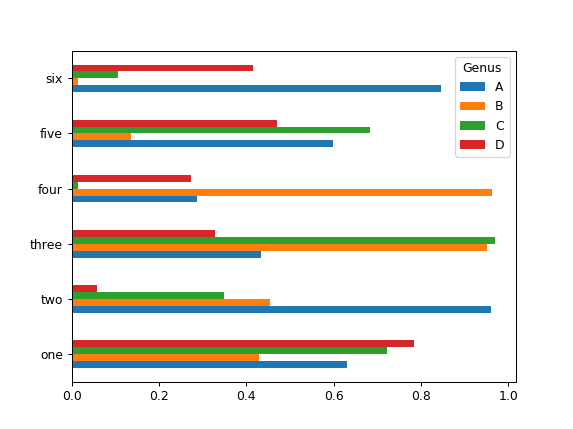

In [49]:
df.plot.barh()

<IPython.core.display.Javascript object>


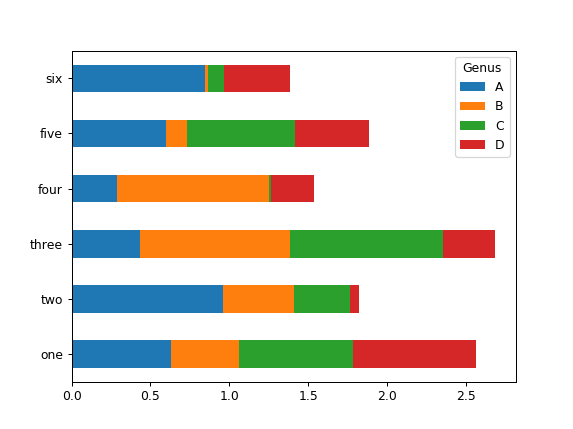

In [50]:
df.plot.barh(stacked=True)

In [51]:
tips = pd.read_csv('examples/tips.csv')

In [52]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [53]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [54]:
party_counts = party_counts.loc[:, 2:5]

In [55]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


*normalize to sum to 1*

In [56]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [57]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


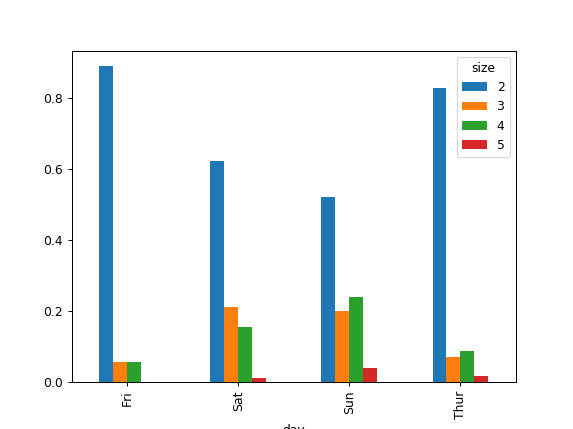

In [58]:
party_pcts.plot.bar()

    With data that requires aggregation or summarization before making a plot, using the
    seaborn package can make things much simpler.

In [59]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [60]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


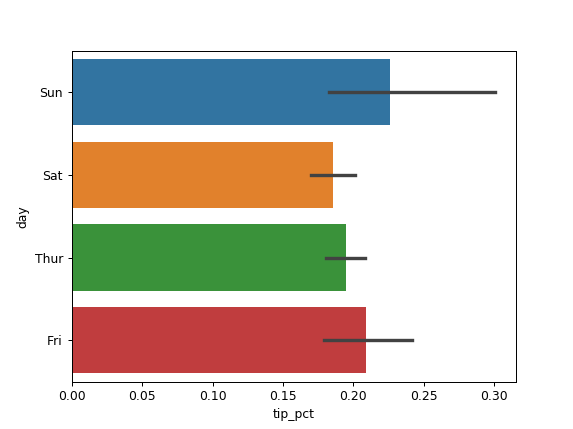

In [61]:
fig = plt.figure()

In [62]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

    Plotting functions in seaborn take a data argument, which can be a pandas Data‐
    Frame. The other arguments refer to column names. Because there are multiple
    observations for each value in the day , the bars are the average value of tip_pct \. The black lines drawn on the bars represent the 95% confidence interval (this can be configured through optional arguments).

<IPython.core.display.Javascript object>


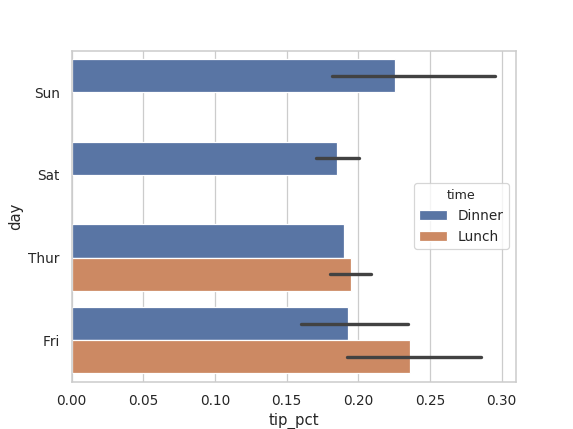

In [67]:
fig = plt.figure()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [68]:
sns.set(style='whitegrid')

### Histograms and Density Plots

    A histogram is a kind of bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. Using the tipping data from before, we can make a histogram of tip percentages of the total bill using the plot.hist method on the Series

<IPython.core.display.Javascript object>


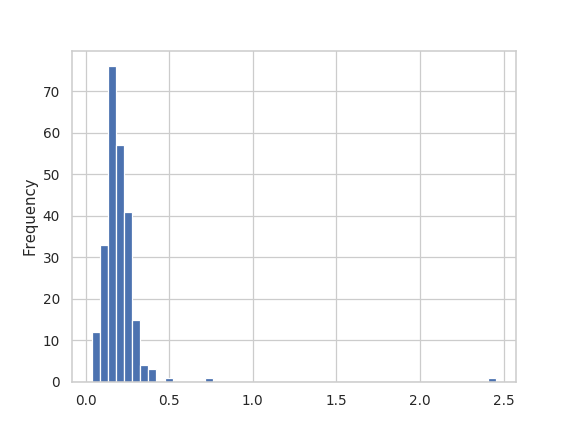

In [69]:
fig = plt.figure()
tips['tip_pct'].plot.hist(bins=50)

    A related plot type is a density plot, which is formed by computing an estimate of a
    continuous probability distribution that might have generated the observed data. The
    usual procedure is to approximate this distribution as a mixture of “kernels”—that is, simpler distributions like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. Using plot.kde makes a density plot using the conventional mixture-of-normals estimate

/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


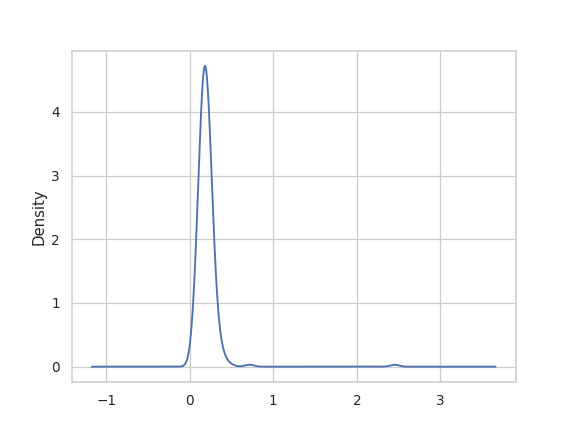

In [72]:
fig = plt.figure()
tips['tip_pct'].plot.density()

    Seaborn makes histograms and density plots even easier through its distplot
    method, which can plot both a histogram and a continuous density estimate simultaneously. As an example, consider a bimodal distribution consisting of draws from
    two different standard normal distributions

/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


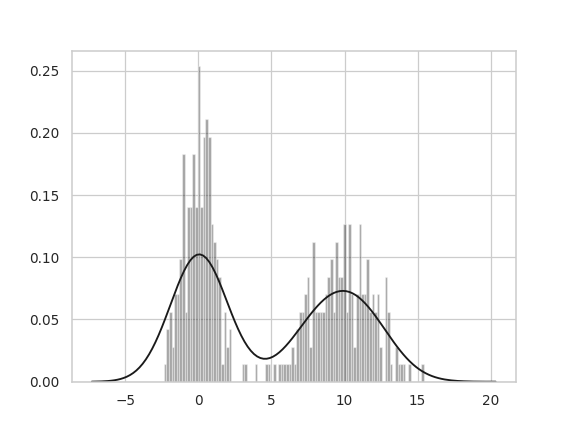

In [73]:
fig = plt.figure()
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

## Scatter or Point Plots

    Point plots or scatter plots can be a useful way of examining the relationship between
    two one-dimensional data series. For example, here we load the macrodata dataset
    from the statsmodels project, select a few variables, then compute log differences:

In [74]:
macro = pd.read_csv('examples/macrodata.csv')

In [75]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [76]:
trans_data = np.log(data).diff().dropna()

In [77]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


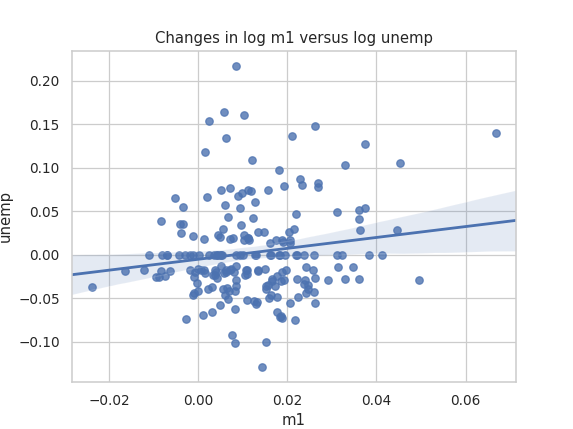

In [78]:
fig = plt.figure()
sns.regplot('m1', 'unemp', data=trans_data)

In [79]:
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5, 1, 'Changes in log m1 versus log unemp')

/home/vlad/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


<IPython.core.display.Javascript object>


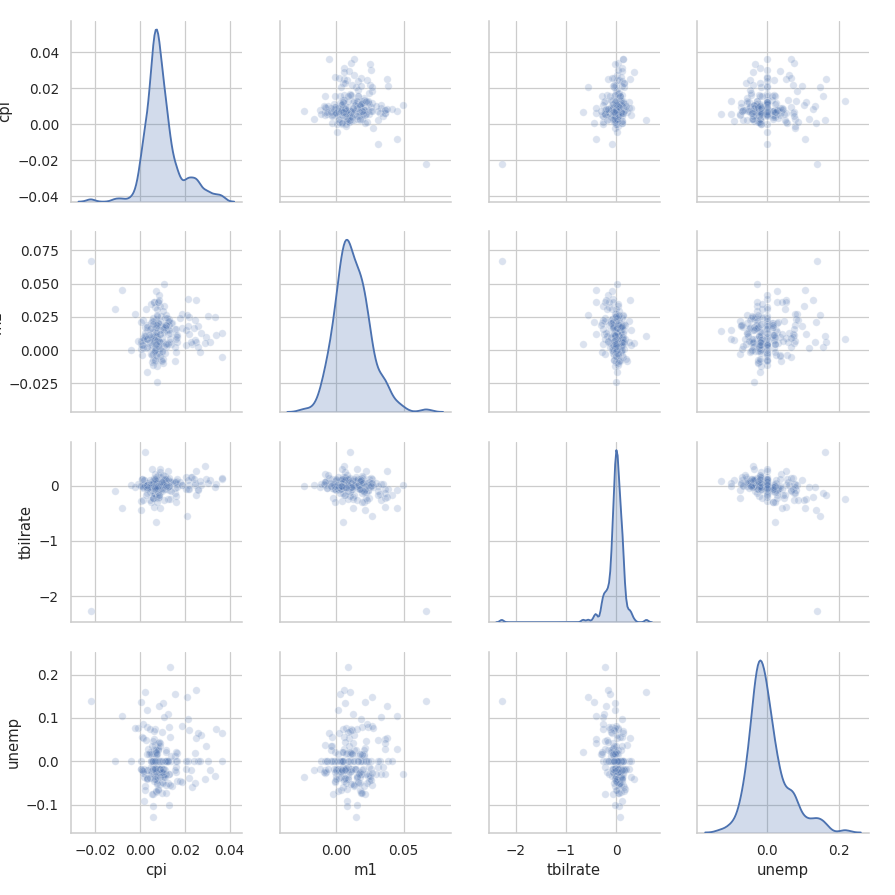

In [84]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

## Facet Grids and Categorical Data

    What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use a facet grid. Seaborn has a useful
    built-in function factorplot that simplifies making many kinds of faceted plots

<IPython.core.display.Javascript object>


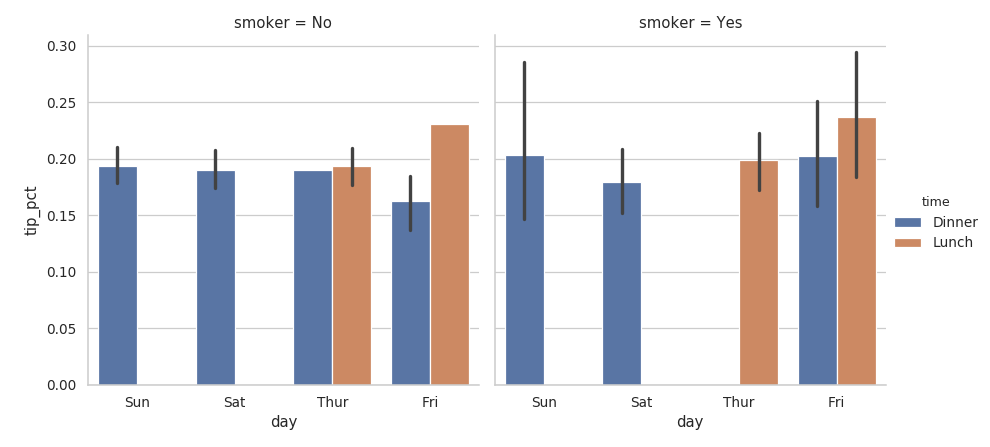

In [83]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
                kind='bar', data=tips[tips.tip_pct < 1])

    Instead of grouping by 'time' by different bar colors within a facet, we can also
    expand the facet grid by adding one row per time value

<IPython.core.display.Javascript object>


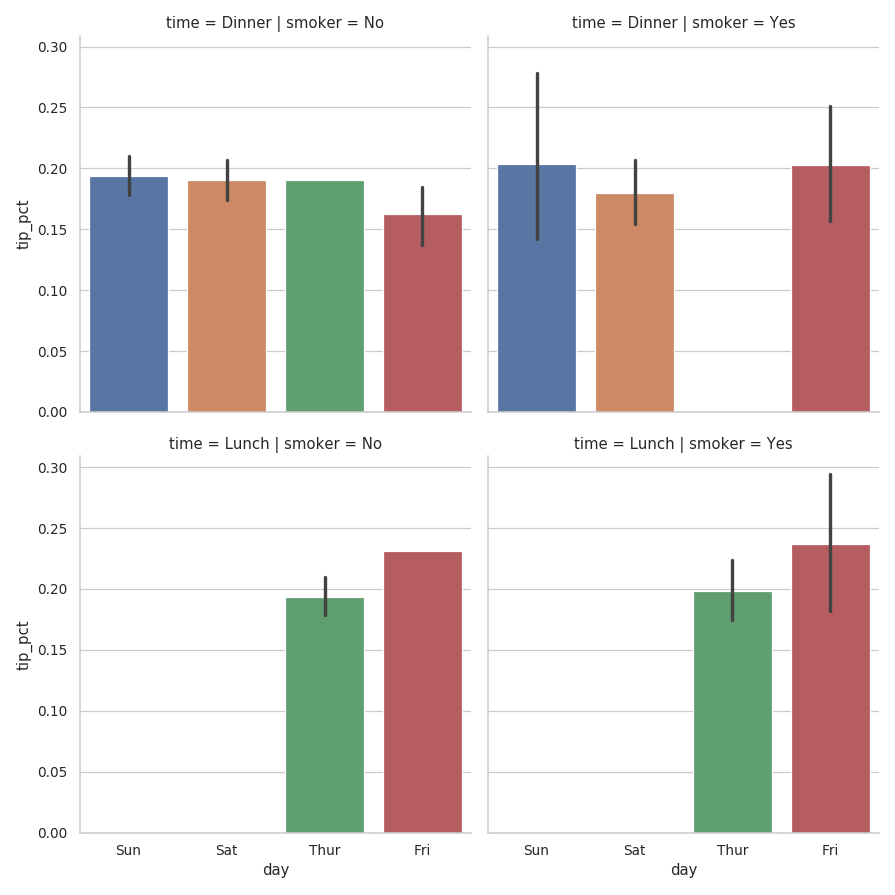

In [85]:
sns.factorplot(x='day', y='tip_pct', row='time',
                col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

    factorplot supports other plot types that may be useful depending on what you are
    trying to display. For example, box plots (which show the median, quartiles, and outliers) can be an effective visualization type

<IPython.core.display.Javascript object>


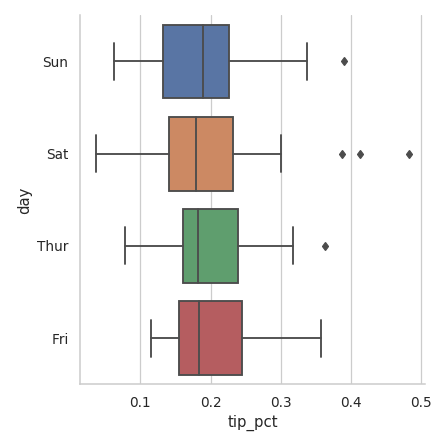

In [86]:
sns.factorplot(x='tip_pct', y='day', kind='box',
                data=tips[tips.tip_pct < 0.5])

/home/vlad/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/vlad/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


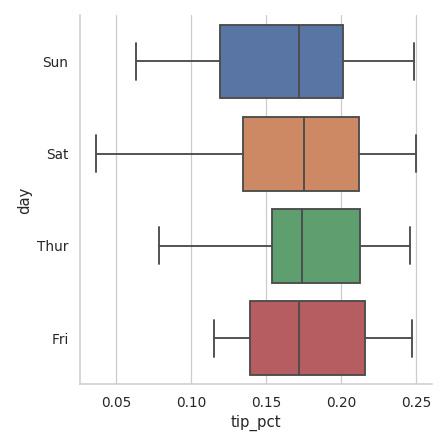

In [87]:
sns.factorplot(x='tip_pct', y='day', kind='box',
                data=tips[tips.tip_pct < 0.25])

/home/vlad/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/vlad/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


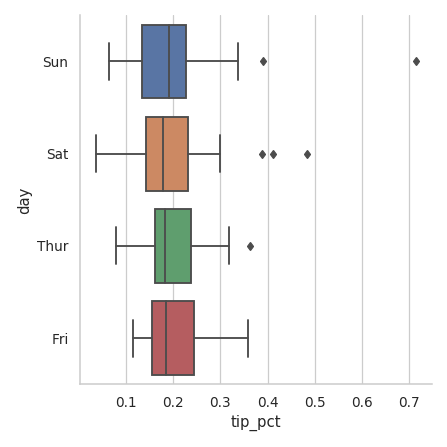

In [88]:
sns.factorplot(x='tip_pct', y='day', kind='box',
                data=tips[tips.tip_pct < 0.75])